# 数据抓取

In [1]:
import requests

In [2]:
week_url = 'https://dappradar.com/v2/api/dapp/thundercore/games/galaxy-blocks/chart/week'
month_url = 'https://dappradar.com/v2/api/dapp/thundercore/games/galaxy-blocks/chart/month'
all_url = 'https://dappradar.com/v2/api/dapp/thundercore/games/galaxy-blocks/chart/all'

In [6]:
params = {
    ':authority': 'dappradar.com',
    ':path': '/v2/api/dapp/thundercore/games/galaxy-blocks/chart/week',
}

In [7]:
headers = {
    'cookie': '__cfduid=d87b8e46401fad8e04b0395c6f31f22911617082335; _ga=GA1.2.189733543.1617082335; _gid=GA1.2.645825448.1617082335; _rdt_uuid=1617082346122.934071ca-529e-4361-80b4-96f037f64020; _fbp=fb.1.1617082347737.332184334; _hjid=a4521e83-66b7-4bb4-8658-95f6b9a93041; _gat=1; _hp2_id.3928182892=%7B%22userId%22%3A%224342861640682969%22%2C%22pageviewId%22%3A%224126843480895195%22%2C%22sessionId%22%3A%224259085859779402%22%2C%22identity%22%3Anull%2C%22trackerVersion%22%3A%224.0%22%7D; _hjIncludedInSessionSample=1; _hjAbsoluteSessionInProgress=1; _hp2_ses_props.3928182892=%7B%22ts%22%3A1617097371792%2C%22d%22%3A%22dappradar.com%22%2C%22h%22%3A%22%2Fthundercore%2Fgames%2Fgalaxy-blocks%22%7D',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.192 Safari/537.36',
}

In [13]:
week = requests.get(week_url, params=params, headers=headers)
month = requests.get(month_url, params=params, headers=headers)
all_ = requests.get(all_url, params=params, headers=headers)

In [20]:
type(month.json())

dict

In [30]:
import pickle

In [32]:
pickle.dump(week.json(), open('./week.pkl', 'wb'))
pickle.dump(month.json(), open('./month.pkl', 'wb'))
pickle.dump(all_.json(), open('./all_.pkl', 'wb'))

In [33]:
pickle.load(open('./week.pkl', 'rb'))

{'series': [{'name': 'Users',
   'data': [12198, 11266, 10695, 11356, 10321, 10584]},
  {'name': 'Volume', 'data': [44540, 41603, 41973, 43661, 37459, 38982]},
  {'name': 'Transactions',
   'data': [15581, 14929, 14558, 15165, 14204, 14457]}],
 'xaxis': [1616976000000,
  1616889600000,
  1616803200000,
  1616716800000,
  1616630400000,
  1616544000000]}

# 数据处理

In [1]:
import pickle

In [4]:
week = pickle.load(open('./data/week.pkl', 'rb'))
month = pickle.load(open('./data/month.pkl', 'rb'))
all_ = pickle.load(open('./data/all_.pkl', 'rb'))

In [5]:
type(week), type(month), type(all_)

(dict, dict, dict)

In [6]:
# 发现里面有三个数据比较重要，users，volums，transactions
week

{'series': [{'name': 'Users',
   'data': [12198, 11266, 10695, 11356, 10321, 10584]},
  {'name': 'Volume', 'data': [44540, 41603, 41973, 43661, 37459, 38982]},
  {'name': 'Transactions',
   'data': [15581, 14929, 14558, 15165, 14204, 14457]}],
 'xaxis': [1616976000000,
  1616889600000,
  1616803200000,
  1616716800000,
  1616630400000,
  1616544000000]}

In [7]:
week['series'] # 是一个列表

[{'name': 'Users', 'data': [12198, 11266, 10695, 11356, 10321, 10584]},
 {'name': 'Volume', 'data': [44540, 41603, 41973, 43661, 37459, 38982]},
 {'name': 'Transactions', 'data': [15581, 14929, 14558, 15165, 14204, 14457]}]

In [8]:
week['series'][0] # 列表里面每个元素都是一个字典

{'name': 'Users', 'data': [12198, 11266, 10695, 11356, 10321, 10584]}

In [9]:
# 可以发现不管是week，还是month ，all数据，字典都是这种结构，所以可以写成函数的形式
def data_process(data):
    Users, Volume, Transactions = [], [], []
    Position = data['xaxis']
    data = data['series']
    for i in data:
        if i['name'] == 'Users':
            Users.extend(i['data'])
        elif i['name'] == 'Volume':
            Volume.extend(i['data'])
        else:
            Transactions.extend(i['data'])
    
    return Users, Volume, Transactions, Position

In [10]:
week_users, week_volume, week_transactions, week_position = data_process(week)

In [12]:
week_users, week_volume, week_transactions, week_position

([12198, 11266, 10695, 11356, 10321, 10584],
 [44540, 41603, 41973, 43661, 37459, 38982],
 [15581, 14929, 14558, 15165, 14204, 14457],
 [1616976000000,
  1616889600000,
  1616803200000,
  1616716800000,
  1616630400000,
  1616544000000])

In [13]:
month_users, month_volume, month_transactions, month_position = data_process(month)
all_users, all_volume, all_transactions, all_position = data_process(all_)

In [14]:
len(month_users), len(all_users)

(29, 561)

In [15]:
import numpy as np

In [16]:

# 对日期进行排序
def get_rank_data(users, volumn, transaction, position):
    dic = dict(zip(position, range(len(position))))
    p = []
    for i in sorted(dic):
        p.append(dic[i])
    users = np.asarray(users)[p].tolist()
    volumn = np.asarray(volumn)[p].tolist()
    transaction = np.asarray(transaction)[p].tolist()

    return users, volumn, transaction

In [17]:
week_users, week_volume, week_transactions = get_rank_data(week_users, week_volume, week_transactions, week_position)

In [19]:
week_users, week_volume, week_transactions

([10584, 10321, 11356, 10695, 11266, 12198],
 [38982, 37459, 43661, 41973, 41603, 44540],
 [14457, 14204, 15165, 14558, 14929, 15581])

In [20]:
month_users, month_volume, month_transactions = get_rank_data(month_users, month_volume, month_transactions, month_position)
all_users, all_volume, all_transactions = get_rank_data(all_users, all_volume, all_transactions, all_position)

# 数据可视化

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

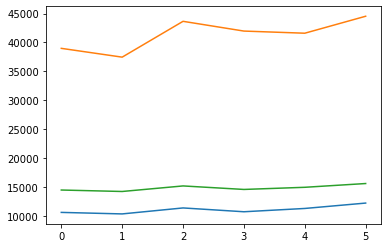

In [23]:
plt.figure()
plt.plot(week_users)
plt.plot(week_volume)
plt.plot(week_transactions)
plt.show()

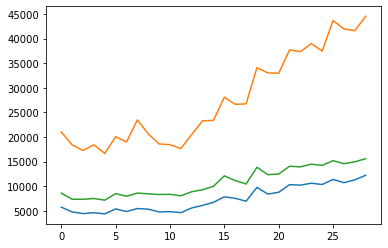

In [24]:
plt.figure()
plt.plot(month_users)
plt.plot(month_volume)
plt.plot(month_transactions)
plt.show()

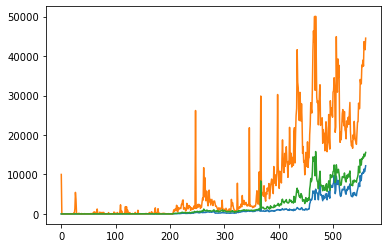

In [25]:
plt.figure()
plt.plot(all_users)
plt.plot(all_volume)
plt.plot(all_transactions)
plt.show()

In [26]:
# 对图片进行美化

/Users/mikizhu/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

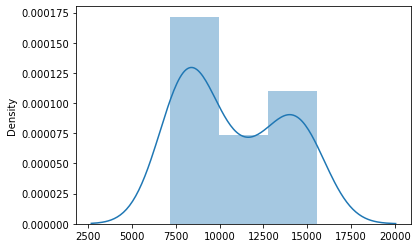

In [31]:
sns.distplot(month_transactions)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


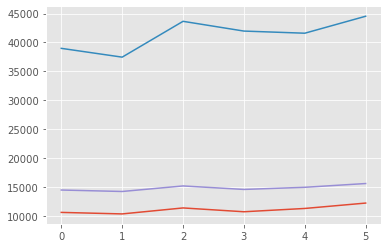

In [33]:
plt.figure()
plt.plot(week_users)
plt.plot(week_volume)
plt.plot(week_transactions)
plt.show()

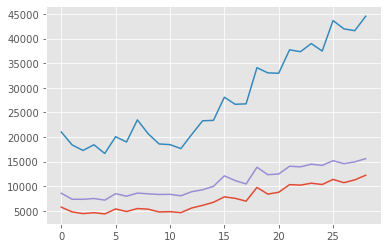

In [34]:
plt.figure()
plt.plot(month_users)
plt.plot(month_volume)
plt.plot(month_transactions)
plt.show()

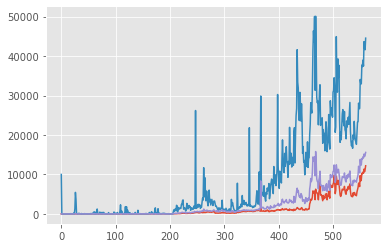

In [35]:
plt.figure()
plt.plot(all_users)
plt.plot(all_volume)
plt.plot(all_transactions)
plt.show()

In [36]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

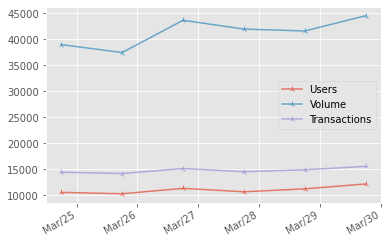

In [98]:
fig, ax = plt.subplots()

# 可以设置的参数MONTHLY, WEEKLY, DAILY
rule = mdates.rrulewrapper(mdates.DAILY, interval=1) # 设置时间刻度, interval为时间间隔
loc = mdates.RRuleLocator(rule) # 对时间刻度进行封装

dateFmt = mdates.DateFormatter('%b/%d')

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(dateFmt)

ax.tick_params(axis='both', direction='out', labelsize=10)

date1 = datetime.date(2021, 3, 31)
date2 = datetime.date(2021, 3, 25)
delta = datetime.timedelta(days=1)
dates = mdates.drange(date2, date1, delta)

ax.plot_date(dates, week_users, '-', alpha=0.7, marker='2', label='Users')
ax.plot_date(dates, week_volume, '-', alpha=0.7, marker='2', label='Volume')
ax.plot_date(dates, week_transactions, '-', alpha=0.7, marker='2', label='Transactions')

plt.legend() # 添加图例
fig.autofmt_xdate()
plt.savefig('week.jpg') # 图片保存
plt.show()

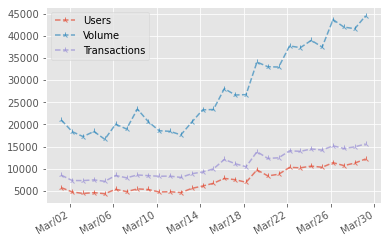

In [97]:
fig, ax = plt.subplots()

# 可以设置的参数MONTHLY, WEEKLY, DAILY
rule = mdates.rrulewrapper(mdates.DAILY, interval=4) # 设置时间刻度, interval为时间间隔
loc = mdates.RRuleLocator(rule) # 对时间刻度进行封装

dateFmt = mdates.DateFormatter('%b/%d')

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(dateFmt)

ax.tick_params(axis='both', direction='out', labelsize=10)

date1 = datetime.date(2021, 3, 31)
date2 = datetime.date(2021, 3, 2)
delta = datetime.timedelta(days=1)
dates = mdates.drange(date2, date1, delta)

ax.plot_date(dates, month_users, '--', alpha=0.7, marker='2', label='Users')
ax.plot_date(dates, month_volume, '--', alpha=0.7, marker='2', label='Volume')
ax.plot_date(dates, month_transactions, '--', alpha=0.7, marker='2', label='Transactions')

plt.legend() # 添加图例
fig.autofmt_xdate()
plt.savefig('month.jpg') # 图片保存
plt.show()

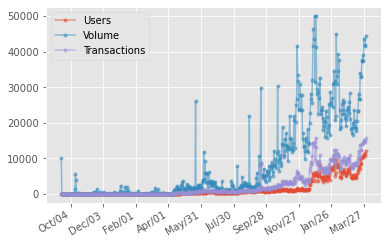

In [120]:
fig, ax = plt.subplots()

# 可以设置的参数MONTHLY, WEEKLY, DAILY
rule = mdates.rrulewrapper(mdates.DAILY, interval=60) # 设置时间刻度, interval为时间间隔
loc = mdates.RRuleLocator(rule) # 对时间刻度进行封装

dateFmt = mdates.DateFormatter('%b/%d')

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(dateFmt)

ax.tick_params(axis='both', direction='out', labelsize=10)

date1 = datetime.date(2021, 3, 31)
date2 = datetime.date(2019, 9, 17)
delta = datetime.timedelta(days=1)
dates = mdates.drange(date2, date1, delta)

ax.plot_date(dates, all_users, '-', alpha=0.5, marker='.', label='Users')
ax.plot_date(dates, all_volume, '-', alpha=0.5, marker='.', label='Volume')
ax.plot_date(dates, all_transactions, '-', alpha=0.5, marker='.', label='Transactions')

plt.legend() # 添加图例
fig.autofmt_xdate()
plt.savefig('all.jpg') # 图片保存
plt.show()

In [130]:
# 开始封装成函数
def plot_img(users, volume, transactions, time='week'):
    '''
    time: 有week，month， all三种格式，显示时间间隔不一样
    '''
    fig, ax = plt.subplots()
    interval = {'week':1, 'month':4, 'all':60}
    date2 = {'week':datetime.date(2021, 3, 25), 'month':datetime.date(2021, 3, 2), 'all':datetime.date(2019, 9, 17)}
    markers = {'week':'o', 'month':'2', 'all':'.'}

    # 可以设置的参数MONTHLY, WEEKLY, DAILY
    rule = mdates.rrulewrapper(mdates.DAILY, interval=interval[time]) # 设置时间刻度, interval为时间间隔
    loc = mdates.RRuleLocator(rule) # 对时间刻度进行封装
    dateFmt = mdates.DateFormatter('%b/%d')

    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(dateFmt)

    ax.tick_params(axis='both', direction='out', labelsize=10)

    date1 = datetime.date(2021, 3, 31) # 不管是week还是month，结束时间都是一样的，只是起始时间不一样
    delta = datetime.timedelta(days=1)
    dates = mdates.drange(date2[time], date1, delta)

    ax.plot_date(dates, users, '-', alpha=0.5, marker=markers[time], label='Users')
    ax.plot_date(dates, volume, '-', alpha=0.5, marker=markers[time], label='Volume')
    ax.plot_date(dates, transactions, '-', alpha=0.5, marker=markers[time], label='Transactions')

    plt.legend() # 添加图例
    plt.title(time)
    fig.autofmt_xdate()
    img_name = time + '.jpg'
    if not os.path.exists('./picture'):
        os.mkdir('./picture')
    plt.savefig('./picture/' + img_name) # 图片保存
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


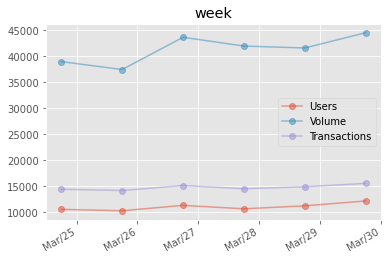

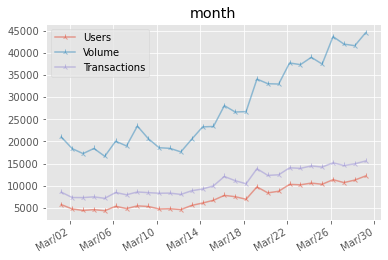

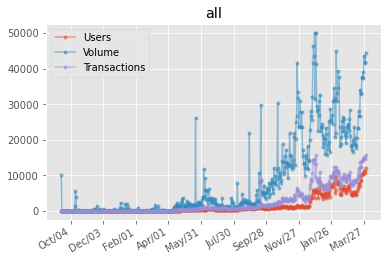

In [131]:
plot_img(week_users, week_volume, week_transactions, time='week')
plot_img(month_users, month_volume, month_transactions, time='month')
plot_img(all_users, all_volume, all_transactions, time='all')

# 时间序列模型

In [8]:
# 导入必要模块
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle
import gc

In [10]:
import datetime
import time

In [45]:
from sklearn.model_selection import train_test_split

In [4]:
# 可以发现不管是week，还是month ，all数据，字典都是这种结构，所以可以写成函数的形式
def data_process(data):
    Users, Volume, Transactions = [], [], []
    Position = data['xaxis']
    data = data['series']
    for i in data:
        if i['name'] == 'Users':
            Users.extend(i['data'])
        elif i['name'] == 'Volume':
            Volume.extend(i['data'])
        else:
            Transactions.extend(i['data'])
    
    return Users, Volume, Transactions, Position

In [6]:
# 对日期进行排序
def get_rank_data(users, volumn, transaction, position):
    dic = dict(zip(position, range(len(position))))
    p = []
    for i in sorted(dic):
        p.append(dic[i])
    users = np.asarray(users)[p].tolist()
    volumn = np.asarray(volumn)[p].tolist()
    transaction = np.asarray(transaction)[p].tolist()

    return users, volumn, transaction

In [2]:
# 数据读取和处理
week = pickle.load(open('./data/week.pkl', 'rb'))
month = pickle.load(open('./data/month.pkl', 'rb'))
all_ = pickle.load(open('./data/all_.pkl', 'rb'))

In [5]:
week_users, week_volume, week_transactions, week_position = data_process(week)
month_users, month_volume, month_transactions, month_position = data_process(month)
all_users, all_volume, all_transactions, all_position = data_process(all_)

In [7]:
week_users, week_volume, week_transactions = get_rank_data(week_users, week_volume, week_transactions, week_position)
month_users, month_volume, month_transactions = get_rank_data(month_users, month_volume, month_transactions, month_position)
all_users, all_volume, all_transactions = get_rank_data(all_users, all_volume, all_transactions, all_position)

In [9]:
# 没有用的变量可以删掉，避免占用内存
del week, month, all_, week_position, month_position, all_position; gc.collect()

160

In [18]:
# 因为没有时间，所以这里针对数据创建时间
date = pd.date_range('2019-9-17', '2021-3-30', freq='D') # 生成30号一共561个数据

In [19]:
len(date), len(all_transactions)

(561, 561)

In [21]:
# 创建pandas对象
df = pd.DataFrame({
    'transactions':all_transactions,
    'date':date
})

In [24]:
df.tail() # 查看最近几笔交易情况

,transactions,date
556,14204,2021-03-26
557,15165,2021-03-27
558,14558,2021-03-28
559,14929,2021-03-29
560,15581,2021-03-30


In [27]:
df = df.set_index(df.date)

In [30]:
del df['date']

In [36]:
df.head(3)

,transactions
date,
2019-09-17,1
2019-09-18,0
2019-09-19,0


<AxesSubplot:xlabel='date'>

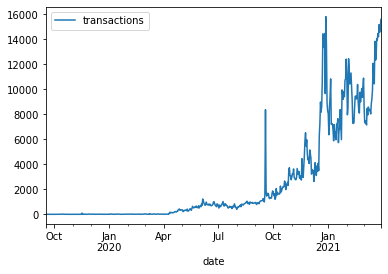

In [32]:
df.plot() # 粗略进行画图

In [34]:
data = df.sort_index(ascending=True, axis=0) # 按时间进行排序，虽然数据前面已经处理好了

In [50]:
# 训练集和测试集的划分
train, test = train_test_split(data, test_size=0.2, shuffle=False) # 因为默认shuffle是打乱，这里设置为False

<AxesSubplot:xlabel='date'>

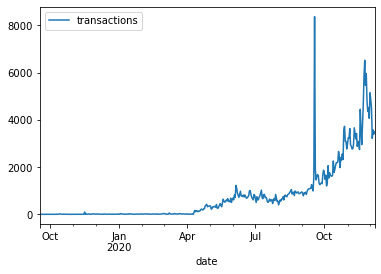

In [52]:
train.plot()

<AxesSubplot:xlabel='date'>

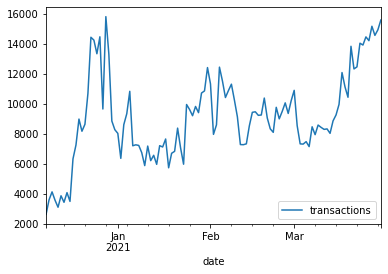

In [53]:
test.plot()

In [71]:
# 构造数据集
scaler = MinMaxScaler(feature_range=(0, 1)) # 进行归一化
scaler_data = scaler.fit_transform(data.values)

In [72]:
# 构造数据集是为了输入到LSTM中
x_train, y_train = [], []
window = 30 # 设置时间窗口，构造训练集和标签
# 窗口为30表示，用30长度窗口滑动，前30个样本作为特征，后1个样本作为标签
for i in range(window, len(train)):
    x_train.append(scaler_data[i-window:i, 0])
    y_train.append(scaler_data[i, 0])

In [73]:
len(x_train), len(y_train)

(418, 418)

In [74]:
x_train, y_train = np.asarray(x_train), np.asarray(y_train) # 转换成numpy形式

In [75]:
x_train.shape

(418, 30)

根据pytorch的lstm官方文档：https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

输入的特征类型为：

input of shape (seq_len, batch, input_size): tensor containing the features of the input sequence. The input can also be a packed variable length sequence. 

In [68]:
import torch
import torch.nn as nn
from torch import optim

In [90]:
from torch.utils.data import Dataset, DataLoader

In [76]:
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)

In [77]:
x_train_tensor.shape

torch.Size([418, 30])

In [86]:
x_train_tensor.unsqueeze(dim=-1).shape

torch.Size([418, 30, 1])

In [88]:
# 使用permute方法，将维度进行切换
x_train_tensor = x_train_tensor.unsqueeze(dim=-1).permute(1, 0, 2)

In [89]:
x_train_tensor.shape

torch.Size([30, 418, 1])